
# Salary Prediction on Hitters Data Set:


## AIM
My aim in this study is to set up machine learning models for the Hitters data set and minimize error scores. The works I have done for this purpose are as follows:

## Hitters: Baseball Data

### Description
Major League Baseball Data from the 1986 and 1987 seasons.Major League Baseball Data from the 1986 and 1987 seasons.
    
### Format
A data frame with 322 observations of major league players on the following 20 variables.

### Variables

* AtBat  : Number of times at bat in 1986
* Hits    : Number of hits in 1986
* HmRun   : Number of home runs in 1986
* Runs    : Number of runs in 1986
* RBI     : Number of runs batted in in 1986
* Walks   : Number of walks in 1986
* Years   : Number of years in the major leagues
* CAtBat  : Number of times at bat during his career
* CHits   : Number of hits during his career
* CHmRun  : Number of home runs during his career
* CRuns   : Number of runs during his career
* CRBI    : Number of runs batted in during his career
* CWalks  : Number of walks during his career
* League  : A factor with levels A and N indicating player's league at the end of 1986
* Division: A factor with levels E and W indicating player's division at the end of 1986
* PutOuts : Number of put outs in 1986
* Assists : Number of assists in 1986
* Errors  : Number of errors in 1986
* Salary  : 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987.

### Source
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.
       
## 1. Library Import Operations:

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [85]:
from warnings import filterwarnings
filterwarnings('ignore')

## 2. Reading Data:

In [86]:
hitters = pd.read_csv('../input/hitters/Hitters.csv')
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [87]:
#Exploratory Data Analysis
#Structural information of the data set
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [88]:
hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

It was observed that there were three 'Object' type variables in the data set and there were 59 missing data in the 'Salary' variable.

First of all, we get rid of the variables that are seen as 'Object' with the 'get.dummies' operation.

In [89]:
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']]) 
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,1,0,1,0,1,0
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1


In [90]:
X_ = hitters.drop(['League', 'Division', 'NewLeague'], axis=1).astype('float64') 

hitters = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1) 

hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  Salary       263 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

In [91]:
hitters.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


## 3. We will create different data sets for different scenarios that we will apply for salary estimation.

### 3.1. We create the data set 'df_1' by simply deleting the missing data without making any changes to the variables:

In [92]:
df_1 = hitters.dropna()
df_1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0


In [93]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  Salary       263 non-null    float64
 17  League_N     263 non-null    uint8  
 18  Division_W   263 non-null    uint8  
 19  NewLeagu

### 3.2. The data set named 'df_2' is created by assigning the average of the variable 'Salary' where they replace the missing data:

In [94]:
df = hitters.copy()
df['Salary'].fillna(df['Salary'].mean(), inplace = True) 
df_2 = df.copy()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

### 3.3.  Missing Data is Filled with Gradient Boosting Regression Estimation Results and data set named 'df_3' is created:

In [95]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,NaN,0,0,0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1,0,1


In [96]:
null = hitters[hitters['Salary'].isnull()]
# Selection of observations with missing data
null.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,NaN,0,0,0
15,183.0,39.0,3.0,20.0,15.0,11.0,3.0,201.0,42.0,3.0,20.0,16.0,11.0,118.0,0.0,0.0,NaN,0,1,0
18,407.0,104.0,6.0,57.0,43.0,65.0,12.0,5233.0,1478.0,100.0,643.0,658.0,653.0,912.0,88.0,9.0,NaN,0,1,0
22,22.0,10.0,1.0,4.0,2.0,1.0,6.0,84.0,26.0,2.0,9.0,9.0,3.0,812.0,84.0,11.0,NaN,0,1,0
30,313.0,84.0,9.0,42.0,30.0,39.0,17.0,6890.0,1833.0,224.0,1033.0,864.0,1087.0,127.0,221.0,7.0,NaN,0,1,0


In [97]:
df = hitters.dropna() #Delete observations with missing data
X_train = df.drop('Salary', axis = 1) #Train set definition
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [98]:
y_train = df[['Salary']] #Determination of the dependent variable of the train set
y_train.head()

,Salary
1,475.0
2,480.0
3,500.0
4,91.5
5,750.0


In [99]:
X_test = null.drop('Salary', axis = 1) #Defining observations with missing data in the data set as a test set
X_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,0,0,0
15,183.0,39.0,3.0,20.0,15.0,11.0,3.0,201.0,42.0,3.0,20.0,16.0,11.0,118.0,0.0,0.0,0,1,0
18,407.0,104.0,6.0,57.0,43.0,65.0,12.0,5233.0,1478.0,100.0,643.0,658.0,653.0,912.0,88.0,9.0,0,1,0
22,22.0,10.0,1.0,4.0,2.0,1.0,6.0,84.0,26.0,2.0,9.0,9.0,3.0,812.0,84.0,11.0,0,1,0
30,313.0,84.0,9.0,42.0,30.0,39.0,17.0,6890.0,1833.0,224.0,1033.0,864.0,1087.0,127.0,221.0,7.0,0,1,0


In [100]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model_pred_test = gbm_model.predict(X_test)
gbm_model_pred_test

array([  75.23011003,   97.38442803, 1025.21089613,  879.19138388,
        501.13854927, 1358.84924263,  258.46451015,  495.54471219,
        114.5496663 ,  520.43647504,  538.45131931,  538.05138796,
        793.33603762, 1333.4479859 ,  439.53349424,  899.98695549,
        176.11528943,  542.44257438,  127.70598991,  302.57311877,
        961.25419976,  285.49394923,  487.43136039,  439.93523688,
        168.13851794,  512.7631411 ,  843.67926567,  257.93318926,
        182.84193675,  535.6852837 ,  890.32082429,  299.5714334 ,
        517.89355533,  282.46160497,  213.81193415,  394.15808786,
        145.32828613,  193.78351163,  115.6610318 ,  114.72692024,
        113.95255677,  707.91712419,  224.77760809,  201.29258808,
        471.7183632 ,  484.73384471,  476.74794935, 1128.77802958,
        698.25938904,  728.7902525 ,  112.05322172,  461.03505751,
         86.92041275, 1676.20642016,  471.38311521,  217.36719554,
        569.95286124, 1180.45478052,  241.97039742])

In [101]:
X_test['Salary'] = gbm_model_pred_test

In [102]:
df_3 = pd.concat([df, X_test], ignore_index = True)
df_3.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1,0,1
4,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0


In [103]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

In [104]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.250000,379.50,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.000000,96.00,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.000000,8.00,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.250000,48.00,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.000000,44.00,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.000000,35.00,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.000000,6.00,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.750000,1928.00,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.000000,508.00,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.000000,37.50,90.00,548.0


### 3.4. 'Df_4' is created by Suppressing Missing Data with Predicted Values and Suppressing Values:

In [105]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

### With Local Outlier Factor, outliers of the variables will be determined.

In [106]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df_3)
df_scores = clf.negative_outlier_factor_
df_scores[0:20]

array([-1.05222481, -1.25991054, -0.99206035, -1.7961222 , -1.03522547,
       -0.98629273, -1.12045484, -1.14965105, -1.05599776, -1.01574211,
       -1.01371117, -1.02333408, -0.9985433 , -1.04636693, -1.11862737,
       -1.0689842 , -0.99663288, -1.02290733, -1.05339678, -1.0344788 ])

In [107]:
np.sort(df_scores)

array([-5.3328336 , -4.73090876, -4.59084314, -3.99002096, -3.0388691 ,
       -2.92653866, -2.85280183, -2.67619571, -2.60198173, -2.51422973,
       -2.08102255, -2.0403992 , -1.88372878, -1.80343666, -1.7961222 ,
       -1.75631324, -1.63029443, -1.61582651, -1.5300144 , -1.50744196,
       -1.46031528, -1.42946011, -1.41267971, -1.41200636, -1.41018388,
       -1.40565065, -1.4029139 , -1.38668081, -1.37800111, -1.37584255,
       -1.36206951, -1.35514103, -1.32856796, -1.30474378, -1.30173601,
       -1.29789525, -1.29190567, -1.28591843, -1.27639805, -1.25991054,
       -1.21857611, -1.20707015, -1.19776833, -1.193527  , -1.17985852,
       -1.17750975, -1.17598914, -1.17490514, -1.17365966, -1.17029944,
       -1.15982619, -1.1594945 , -1.15460674, -1.15355312, -1.1521769 ,
       -1.14965105, -1.14961331, -1.1492055 , -1.14900746, -1.14594858,
       -1.14422638, -1.13848233, -1.13661222, -1.13162218, -1.13026435,
       -1.12627751, -1.12045484, -1.12038856, -1.11941641, -1.11

In [108]:
np.sort(df_scores)[16]

-1.6302944327092799

In [109]:
threshold_value = np.sort(df_scores)[16]
threshold_value

-1.6302944327092799

In [110]:
outlier_df = df_scores > threshold_value

In [111]:
df_3[df_scores == threshold_value]


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
76,495.0,151.0,17.0,61.0,84.0,78.0,10.0,5624.0,1679.0,275.0,884.0,1015.0,709.0,1045.0,88.0,13.0,2460.0,0,0,0


In [112]:
pressure_value = df_3[df_scores == threshold_value]

In [113]:
outlier = df_3[~outlier_df] 

In [114]:
outlier.to_records(index=False)

rec.array([(321.,  87., 10.,  39.,  42., 30.,  2.,   396., 1.010e+02,  12., 4.800e+01,   46., 3.300e+01,  805.,  40.,  4.,   91.5       , 1, 0, 1),
           (677., 238., 31., 117., 113., 53.,  5.,  2223., 7.370e+02,  93., 3.490e+02,  401., 1.710e+02, 1377., 100.,  6., 1975.        , 0, 0, 0),
           (495., 151., 17.,  61.,  84., 78., 10.,  5624., 1.679e+03, 275., 8.840e+02, 1015., 7.090e+02, 1045.,  88., 13., 2460.        , 0, 0, 0),
           (574., 152., 31.,  91., 101., 64.,  3.,   985., 2.600e+02,  53., 1.480e+02,  173., 9.500e+01, 1253., 111., 11.,  215.        , 1, 1, 1),
           ( 20.,   1.,  0.,   0.,   0.,  0.,  2.,    41., 9.000e+00,   2., 6.000e+00,    7., 4.000e+00,   78., 220.,  6., 2127.333     , 1, 0, 1),
           (237.,  52.,  0.,  15.,  25., 30., 24., 14053., 4.256e+03, 160., 2.165e+03, 1314., 1.566e+03,  523.,  43.,  6.,  750.        , 1, 1, 1),
           (419., 101., 18.,  65.,  58., 92., 20.,  9528., 2.510e+03, 548., 1.509e+03, 1659., 1.342e+03,    0., 

In [115]:
res = outlier.to_records(index=False)

In [116]:
res[:] = pressure_value.to_records(index = False)

In [117]:
outlier = pd.DataFrame(res, index = df_3[~outlier_df].index)
outlier.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,17.0,495.0,0.0,495.0,495.0,495.0,495.0,495.0
Hits,17.0,151.0,0.0,151.0,151.0,151.0,151.0,151.0
HmRun,17.0,17.0,0.0,17.0,17.0,17.0,17.0,17.0
Runs,17.0,61.0,0.0,61.0,61.0,61.0,61.0,61.0
RBI,17.0,84.0,0.0,84.0,84.0,84.0,84.0,84.0
Walks,17.0,78.0,0.0,78.0,78.0,78.0,78.0,78.0
Years,17.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
CAtBat,17.0,5624.0,0.0,5624.0,5624.0,5624.0,5624.0,5624.0
CHits,17.0,1679.0,0.0,1679.0,1679.0,1679.0,1679.0,1679.0
CHmRun,17.0,275.0,0.0,275.0,275.0,275.0,275.0,275.0


In [118]:
n_outlier = df_3[outlier_df]
n_outlier.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,305.0,387.081967,144.843574,126.0,265.0,381.0,512.0,687.0
Hits,305.0,102.413115,44.105956,27.0,66.0,96.0,137.0,223.0
HmRun,305.0,10.845902,8.568178,0.0,4.0,8.0,16.0,40.0
Runs,305.0,51.668852,24.961915,8.0,31.0,48.0,69.0,130.0
RBI,305.0,48.472131,25.109498,8.0,29.0,44.0,64.0,121.0
Walks,305.0,39.147541,21.015373,3.0,22.0,35.0,53.0,105.0
Years,305.0,7.491803,4.723343,1.0,4.0,6.0,11.0,20.0
CAtBat,305.0,2649.681967,2168.103425,166.0,888.0,1966.0,3926.0,8759.0
CHits,305.0,715.472131,606.352360,34.0,220.0,541.0,1062.0,2583.0
CHmRun,305.0,68.180328,80.460661,0.0,15.0,38.0,90.0,442.0


In [119]:
df_4 = pd.concat([n_outlier, outlier], ignore_index = True)
df_4.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,392.779503,143.013314,126.0,277.25,400.0,509.50000,687.0
Hits,322.0,104.978261,44.280149,27.0,68.00,101.5,142.00000,223.0
HmRun,322.0,11.170807,8.451365,0.0,4.00,9.0,17.00000,40.0
Runs,322.0,52.161491,24.381674,8.0,32.00,49.5,68.75000,130.0
RBI,322.0,50.347826,25.698530,8.0,29.00,45.5,71.75000,121.0
Walks,322.0,41.198758,22.225640,3.0,22.00,36.5,58.00000,105.0
Years,322.0,7.624224,4.630769,1.0,4.00,7.0,10.75000,20.0
CAtBat,322.0,2806.711180,2212.578139,166.0,928.25,2132.0,4407.25000,8759.0
CHits,322.0,766.341615,628.301693,34.0,231.25,569.5,1200.50000,2583.0
CHmRun,322.0,79.099379,90.976784,0.0,16.00,41.0,100.00000,442.0


### 3.5. 'Df_5' is Generated by Filling the Missing Data with Predictions and Deleting the Threshold Data:

In [120]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

In [121]:
df_5 = df_3[df_scores > threshold_value]
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        305 non-null    float64
 1   Hits         305 non-null    float64
 2   HmRun        305 non-null    float64
 3   Runs         305 non-null    float64
 4   RBI          305 non-null    float64
 5   Walks        305 non-null    float64
 6   Years        305 non-null    float64
 7   CAtBat       305 non-null    float64
 8   CHits        305 non-null    float64
 9   CHmRun       305 non-null    float64
 10  CRuns        305 non-null    float64
 11  CRBI         305 non-null    float64
 12  CWalks       305 non-null    float64
 13  PutOuts      305 non-null    float64
 14  Assists      305 non-null    float64
 15  Errors       305 non-null    float64
 16  Salary       305 non-null    float64
 17  League_N     305 non-null    uint8  
 18  Division_W   305 non-null    uint8  
 19  NewLeagu

### 3.6. 'Df_6' is Created by Deleting Missing Data and Pressure Outlier Data:

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  Salary       263 non-null    float64
 17  League_N     263 non-null    uint8  
 18  Division_W   263 non-null    uint8  
 19  NewLeagu

In [123]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df)
df6_scores = clf.negative_outlier_factor_
df6_scores[0:20]

array([-1.05072688, -1.28358152, -0.99783325, -1.66536304, -1.03281612,
       -1.00928433, -1.03651681, -1.04741987, -1.0406773 , -1.02779076,
       -1.0033958 , -1.0009396 , -1.00564364, -1.02721535, -1.13003603,
       -0.99553193, -1.02262938, -0.97463476, -1.00020349, -1.0310504 ])

In [124]:
np.sort(df6_scores)


array([-6.22764656, -4.12325749, -3.14372723, -2.46482586, -2.37903838,
       -1.93271815, -1.92868899, -1.90888428, -1.6775256 , -1.66536304,
       -1.62626849, -1.48361164, -1.48216262, -1.44345727, -1.43603775,
       -1.42239393, -1.40734739, -1.38353101, -1.37252134, -1.3532077 ,
       -1.33614053, -1.31553378, -1.28358152, -1.24753536, -1.2466542 ,
       -1.23081064, -1.21977169, -1.21910119, -1.21892092, -1.21707052,
       -1.19613372, -1.19538894, -1.19180943, -1.1902671 , -1.17955876,
       -1.17212922, -1.17175712, -1.16513625, -1.15860927, -1.15790396,
       -1.14560984, -1.14500522, -1.14412875, -1.13003603, -1.12856341,
       -1.12599954, -1.12431362, -1.1229706 , -1.12257766, -1.11928495,
       -1.11145896, -1.09833129, -1.09068872, -1.09030097, -1.08898031,
       -1.08759344, -1.08672396, -1.08444013, -1.08384656, -1.08051358,
       -1.08043087, -1.0800185 , -1.07548613, -1.07526665, -1.07285076,
       -1.0719063 , -1.06866908, -1.06840926, -1.06657285, -1.06

In [125]:
np.sort(df6_scores)[8]

-1.6775255970612821

In [126]:
threshold_value6 = np.sort(df6_scores)[8]
threshold_value6

-1.6775255970612821

In [127]:
outlier_df6 = df6_scores > threshold_value6
outlier_df6

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [128]:
df[df6_scores == threshold_value6]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
272,512.0,117.0,29.0,54.0,88.0,43.0,6.0,1750.0,412.0,100.0,204.0,276.0,155.0,1236.0,98.0,18.0,100.0,0,1,0


In [129]:
pressure_value6 = df[df6_scores == threshold_value6]

In [130]:
outlier6 = df[~outlier_df6] 


In [131]:
outlier6.to_records(index=False)

rec.array([(677., 238., 31., 117., 113., 53.,  5.,  2223., 7.370e+02,  93., 3.490e+02,  401., 1.710e+02, 1377., 100.,  6., 1975.   , 0, 0, 0),
           (574., 152., 31.,  91., 101., 64.,  3.,   985., 2.600e+02,  53., 1.480e+02,  173., 9.500e+01, 1253., 111., 11.,  215.   , 1, 1, 1),
           ( 20.,   1.,  0.,   0.,   0.,  0.,  2.,    41., 9.000e+00,   2., 6.000e+00,    7., 4.000e+00,   78., 220.,  6., 2127.333, 1, 0, 1),
           (237.,  52.,  0.,  15.,  25., 30., 24., 14053., 4.256e+03, 160., 2.165e+03, 1314., 1.566e+03,  523.,  43.,  6.,  750.   , 1, 1, 1),
           (512., 117., 29.,  54.,  88., 43.,  6.,  1750., 4.120e+02, 100., 2.040e+02,  276., 1.550e+02, 1236.,  98., 18.,  100.   , 0, 1, 0),
           (522., 140., 16.,  73.,  77., 60.,  4.,   730., 1.850e+02,  22., 9.300e+01,  106., 8.600e+01, 1320., 166., 17.,  200.   , 1, 0, 1),
           ( 19.,   4.,  1.,   2.,   3.,  1.,  1.,    19., 4.000e+00,   1., 2.000e+00,    3., 1.000e+00,  692.,  70.,  8.,  920.   , 1, 1, 0),

In [132]:
res6 = outlier6.to_records(index=False)


In [133]:
res6[:] = pressure_value6.to_records(index = False)


In [134]:
n_outlier6 = df[outlier_df6]
n_outlier6.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,254.0,403.921260,143.322440,126.0,283.00,410.5,525.25,687.0
Hits,254.0,107.740157,43.737487,27.0,72.25,103.0,141.00,223.0
HmRun,254.0,11.476378,8.556568,0.0,5.00,9.0,17.00,40.0
Runs,254.0,54.716535,24.922456,8.0,34.00,51.0,72.00,130.0
RBI,254.0,51.153543,25.077194,8.0,30.25,47.0,70.75,121.0
Walks,254.0,41.224409,21.671661,3.0,23.00,37.0,57.00,105.0
Years,254.0,7.385827,4.686280,1.0,4.00,6.0,10.75,20.0
CAtBat,254.0,2669.811024,2186.290351,181.0,911.25,1967.0,3916.75,9528.0
CHits,254.0,723.555118,613.749993,42.0,219.25,542.0,1065.00,2583.0
CHmRun,254.0,69.866142,83.003011,0.0,15.25,40.0,92.00,548.0


In [135]:
outlier6 = pd.DataFrame(res6, index = df[~outlier_df6].index)
outlier6.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,9.0,512.0,0.0,512.0,512.0,512.0,512.0,512.0
Hits,9.0,117.0,0.0,117.0,117.0,117.0,117.0,117.0
HmRun,9.0,29.0,0.0,29.0,29.0,29.0,29.0,29.0
Runs,9.0,54.0,0.0,54.0,54.0,54.0,54.0,54.0
RBI,9.0,88.0,0.0,88.0,88.0,88.0,88.0,88.0
Walks,9.0,43.0,0.0,43.0,43.0,43.0,43.0,43.0
Years,9.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
CAtBat,9.0,1750.0,0.0,1750.0,1750.0,1750.0,1750.0,1750.0
CHits,9.0,412.0,0.0,412.0,412.0,412.0,412.0,412.0
CHmRun,9.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


In [136]:
df_6 = pd.concat([n_outlier6, outlier6], ignore_index = True)
df_6.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,407.619772,142.208400,126.0,285.5,418.0,521.5,687.0
Hits,263.0,108.057034,43.012786,27.0,73.0,108.0,140.0,223.0
HmRun,263.0,12.076046,8.993738,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.692015,24.491006,8.0,34.0,53.0,71.5,130.0
RBI,263.0,52.414449,25.540256,8.0,31.0,48.0,72.5,121.0
Walks,263.0,41.285171,21.298641,3.0,23.5,38.0,56.0,105.0
Years,263.0,7.338403,4.612000,1.0,4.0,6.0,10.0,20.0
CAtBat,263.0,2638.334601,2154.933865,181.0,926.5,1928.0,3849.5,9528.0
CHits,263.0,712.893536,605.780158,42.0,228.5,506.0,1023.0,2583.0
CHmRun,263.0,70.897338,81.749390,0.0,16.0,41.0,97.5,548.0


### 3.7.  Missing and Outlier Data Deletion and Creating 'df_7' Data Set:

In [137]:
df_7 = n_outlier6
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 1 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        254 non-null    float64
 1   Hits         254 non-null    float64
 2   HmRun        254 non-null    float64
 3   Runs         254 non-null    float64
 4   RBI          254 non-null    float64
 5   Walks        254 non-null    float64
 6   Years        254 non-null    float64
 7   CAtBat       254 non-null    float64
 8   CHits        254 non-null    float64
 9   CHmRun       254 non-null    float64
 10  CRuns        254 non-null    float64
 11  CRBI         254 non-null    float64
 12  CWalks       254 non-null    float64
 13  PutOuts      254 non-null    float64
 14  Assists      254 non-null    float64
 15  Errors       254 non-null    float64
 16  Salary       254 non-null    float64
 17  League_N     254 non-null    uint8  
 18  Division_W   254 non-null    uint8  
 19  NewLeagu

## 4. Feature Engineering:

In [138]:
df_8 = hitters.copy()
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  Salary       263 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

### 4.1.  Categorical variables "League_N, Division_W, NewLeague_N" 

In [139]:
cat_df = df_8.select_dtypes(include=["uint8"])
cat_df.head()

,League_N,Division_W,NewLeague_N
0,0,0,0
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1


[0 1]
2
0    175
1    147
Name: League_N, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


League_N
0    541.999547
1    529.117500
Name: Salary, dtype: float64

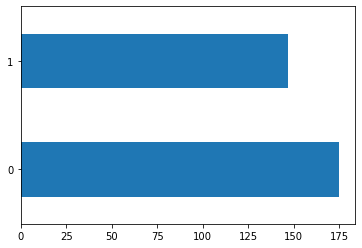

In [140]:
print(cat_df.League_N.unique())
print(cat_df["League_N"].value_counts().count())
print(cat_df["League_N"].value_counts())
print(df_8["League_N"].value_counts().plot.barh())
df_8.groupby('League_N')['Salary'].mean()

[0 1]
2
1    165
0    157
Name: Division_W, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


Division_W
0    624.271364
1    450.876873
Name: Salary, dtype: float64

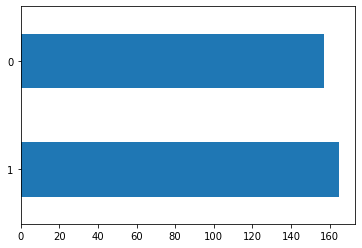

In [141]:
print(cat_df.Division_W.unique())
print(cat_df["Division_W"].value_counts().count())
print(cat_df["Division_W"].value_counts())
print(df_8["Division_W"].value_counts().plot.barh())
df_8.groupby('Division_W')['Salary'].mean()

[0 1]
2
0    176
1    146
Name: NewLeague_N, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


NewLeague_N
0    537.113028
1    534.553852
Name: Salary, dtype: float64

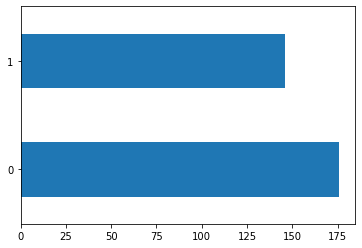

In [142]:
print(cat_df.NewLeague_N.unique())
print(cat_df["NewLeague_N"].value_counts().count())
print(cat_df["NewLeague_N"].value_counts())
print(df_8["NewLeague_N"].value_counts().plot.barh())
df_8.groupby('NewLeague_N')['Salary'].mean()

In [143]:
Experience = []
for ex in df_8['Years']:
    if ex < 5:
        Experience.append(1)
    elif (ex >= 5) & (ex < 10):
        Experience.append(2)
    elif (ex >= 10) & (ex < 15):
        Experience.append(3)
    elif (ex >= 15) & (ex < 20):
        Experience.append(4)
    else:
        Experience.append(5)
df_8['Experience'] = Experience

### The 'years' variable consists of values between the numbers 1 and 24. We enumerated it with numbers from 1 to 5 in the form of 0-4, 5-9, 10-19, 20-24.

In [144]:
df_8.groupby(['League_N', 'Division_W', 'NewLeague_N'])['Salary'].mean()

League_N  Division_W  NewLeague_N
0         0           0              660.433906
                      1              837.500000
          1           0              426.942791
                      1              278.750000
1         0           0              534.000000
                      1              575.772071
          1           0              438.000000
                      1              491.505759
Name: Salary, dtype: float64

In [145]:
df_8.groupby(['League_N', 'Division_W', 'NewLeague_N', 'Experience'])['Salary'].mean()

League_N  Division_W  NewLeague_N  Experience
0         0           0            1              145.961538
                                   2              774.434536
                                   3              918.073533
                                   4              614.375000
                      1            2              850.000000
                                   3              833.333333
          1           0            1              203.821429
                                   2              528.108696
                                   3              786.916700
                                   4              479.000000
                                   5              487.500000
                      1            1               96.666667
                                   3              825.000000
1         0           0            1               70.000000
                                   2              525.000000
                                   3   

### The variables 'League_N', 'Division_W', 'NewLeague_N', 'Experience' are groupby and the average of the variable 'Salary' is taken and these averages are replaced by missing values in the variable 'Salary'.

In [146]:
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 1), "Salary"] = 145.961538
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 2), "Salary"] = 774.434536
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 3), "Salary"] = 918.073533
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 4), "Salary"] = 614.375000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 2), "Salary"] = 850.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 3), "Salary"] = 833.333333
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 1), "Salary"] = 203.821429
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 2), "Salary"] = 528.108696
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 3), "Salary"] = 786.916700
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 4), "Salary"] = 479.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 1), "Salary"] = 96.666667
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 0) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 3), "Salary"] = 825.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 1), "Salary"] = 70.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 2), "Salary"] = 525.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 3), "Salary"] = 500.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 4), "Salary"] = 1050.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 1), "Salary"] = 313.753320
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 2), "Salary"] = 776.095190
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 3), "Salary"] = 949.010143
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 0) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 4), "Salary"] = 486.111000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 1), "Salary"] = 565.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 2), "Salary"] = 405.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 0) & (df_8['Experience'] == 3), "Salary"] = 250.000000
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 1), "Salary"] = 188.138889
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 2), "Salary"] = 538.114053
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 3), "Salary"] = 723.452429
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 4), "Salary"] = 763.666600
df_8.loc[(df_8["Salary"].isnull()) & (df_8["League_N"] == 1) & (df_8['Division_W'] == 1) & (df_8["NewLeague_N"] == 1) & (df_8['Experience'] == 5), "Salary"] = 475.000000


In [147]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

### 4.2. Adding Variables:

The dataset contains data from the players in 1986 and throughout their careers and how many years of experience they have had. We add the annual average of these data and the ratio of the data in 1986 to the overall performance.

In [148]:
df_8['AtBat_rate'] = df_8["CAtBat"] / df_8["Years"]
df_8['Hits_rate'] = df_8["CHits"] / df_8["Years"]
df_8['HmRun_rate'] = df_8["CHmRun"] / df_8["Years"]
df_8['Runs_rate'] = df_8["CRuns"] / df_8["Years"]
df_8['RBI_rate'] = df_8["CRBI"] / df_8["Years"]
df_8['Walks_rate'] = df_8["CWalks"] / df_8["Years"]

df_8['1986_AtBat_rate'] = df_8["AtBat"] / df_8["CAtBat"]
df_8['1986_Hits_rate'] = df_8["Hits"] / df_8["CHits"]
df_8['1986_HmRun_rate'] = df_8["HmRun"] / df_8["CHmRun"]
df_8['1986_Runs_rate'] = df_8["Runs"] / df_8["CRuns"]
df_8['1986_RBI_rate'] = df_8["RBI"] / df_8["CRBI"]
df_8['1986_Walks_rate'] = df_8["Walks"] / df_8["CWalks"]

In [149]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AtBat            322 non-null    float64
 1   Hits             322 non-null    float64
 2   HmRun            322 non-null    float64
 3   Runs             322 non-null    float64
 4   RBI              322 non-null    float64
 5   Walks            322 non-null    float64
 6   Years            322 non-null    float64
 7   CAtBat           322 non-null    float64
 8   CHits            322 non-null    float64
 9   CHmRun           322 non-null    float64
 10  CRuns            322 non-null    float64
 11  CRBI             322 non-null    float64
 12  CWalks           322 non-null    float64
 13  PutOuts          322 non-null    float64
 14  Assists          322 non-null    float64
 15  Errors           322 non-null    float64
 16  Salary           322 non-null    float64
 17  League_N        

In [150]:
df_8 = df_8.dropna()

In [151]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 321
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AtBat            315 non-null    float64
 1   Hits             315 non-null    float64
 2   HmRun            315 non-null    float64
 3   Runs             315 non-null    float64
 4   RBI              315 non-null    float64
 5   Walks            315 non-null    float64
 6   Years            315 non-null    float64
 7   CAtBat           315 non-null    float64
 8   CHits            315 non-null    float64
 9   CHmRun           315 non-null    float64
 10  CRuns            315 non-null    float64
 11  CRBI             315 non-null    float64
 12  CWalks           315 non-null    float64
 13  PutOuts          315 non-null    float64
 14  Assists          315 non-null    float64
 15  Errors           315 non-null    float64
 16  Salary           315 non-null    float64
 17  League_N        

## 5. Predict:

### We have 8 data. For each of these, the following models will be completed.

### Models:

          Linear Regression
          Ridge Regression
          Lasso Regression
          ElasticNet Regression
          LightGBM Regression
          XGBoost Regression
          GradientBoosting Regression 
          RandomForest Regression 
          DecisionTree Regression
          MLP Regression
          KNeighbors Regression
          SupportVector Regression
          
### First, predictions will be made without optimizing hyperparameter.
### The datasets will be divided into '80% train set' and '20% test set' and will be set to 'random_state = 46'.

In [152]:
def compML(df, y, alg):
    #train-test distinction
    y = df[y]
    X = df.drop('Salary', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=46)
    #modeelling
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print("  for data set  ", model_name, " Model Test Error: ",RMSE)

In [153]:
models = [LinearRegression,
          Ridge,
          Lasso,
          ElasticNet,
          LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [154]:
for i in models:
    compML(df_1, "Salary", i)

  for data set   LinearRegression  Model Test Error:  479.07150373702115
  for data set   Ridge  Model Test Error:  479.2257726107792
  for data set   Lasso  Model Test Error:  478.31797216165194
  for data set   ElasticNet  Model Test Error:  486.1834215724991
  for data set   LGBMRegressor  Model Test Error:  387.914002470514
  for data set   XGBRegressor  Model Test Error:  375.62417341483973
  for data set   GradientBoostingRegressor  Model Test Error:  359.93494989988403
  for data set   RandomForestRegressor  Model Test Error:  380.5743814968424
  for data set   DecisionTreeRegressor  Model Test Error:  416.01654946632584
  for data set   MLPRegressor  Model Test Error:  431.6973149489262
  for data set   KNeighborsRegressor  Model Test Error:  438.75715389787524
  for data set   SVR  Model Test Error:  505.22319072462665


In [155]:
for i in models:
    compML(df_2, "Salary", i)

  for data set   LinearRegression  Model Test Error:  327.72459765861737
  for data set   Ridge  Model Test Error:  327.71733354507154
  for data set   Lasso  Model Test Error:  327.32224423373566
  for data set   ElasticNet  Model Test Error:  330.04023314478377
  for data set   LGBMRegressor  Model Test Error:  245.5590318857164
  for data set   XGBRegressor  Model Test Error:  257.5085472651444
  for data set   GradientBoostingRegressor  Model Test Error:  239.2934380927411
  for data set   RandomForestRegressor  Model Test Error:  237.8648719809897
  for data set   DecisionTreeRegressor  Model Test Error:  392.80493871129744
  for data set   MLPRegressor  Model Test Error:  264.5211500447961
  for data set   KNeighborsRegressor  Model Test Error:  321.0184595333892
  for data set   SVR  Model Test Error:  347.4432363527006


In [156]:
for i in models:
    compML(df_3, "Salary", i)

  for data set   LinearRegression  Model Test Error:  359.29000960357934
  for data set   Ridge  Model Test Error:  358.7093917860949
  for data set   Lasso  Model Test Error:  358.15648625309956
  for data set   ElasticNet  Model Test Error:  357.7569082248716
  for data set   LGBMRegressor  Model Test Error:  257.1766259118537
  for data set   XGBRegressor  Model Test Error:  243.178159605109
  for data set   GradientBoostingRegressor  Model Test Error:  221.91924388045683
  for data set   RandomForestRegressor  Model Test Error:  241.51245355661223
  for data set   DecisionTreeRegressor  Model Test Error:  318.7992424113365
  for data set   MLPRegressor  Model Test Error:  292.31866179916847
  for data set   KNeighborsRegressor  Model Test Error:  312.2840234351507
  for data set   SVR  Model Test Error:  415.19287855181557


In [157]:
for i in models:
    compML(df_4, "Salary", i)

  for data set   LinearRegression  Model Test Error:  249.70946475817613
  for data set   Ridge  Model Test Error:  249.46041926358512
  for data set   Lasso  Model Test Error:  248.33660821458946
  for data set   ElasticNet  Model Test Error:  250.22357944701844
  for data set   LGBMRegressor  Model Test Error:  206.73703226510642
  for data set   XGBRegressor  Model Test Error:  191.44465468105545
  for data set   GradientBoostingRegressor  Model Test Error:  198.10509490886005
  for data set   RandomForestRegressor  Model Test Error:  205.05058600333194
  for data set   DecisionTreeRegressor  Model Test Error:  297.24406784932864
  for data set   MLPRegressor  Model Test Error:  228.6237999107529
  for data set   KNeighborsRegressor  Model Test Error:  249.2108896543744
  for data set   SVR  Model Test Error:  620.2770051786732


In [158]:
for i in models:
    compML(df_5, "Salary", i)

  for data set   LinearRegression  Model Test Error:  297.6360885325565
  for data set   Ridge  Model Test Error:  297.4814964850464
  for data set   Lasso  Model Test Error:  296.72226358610885
  for data set   ElasticNet  Model Test Error:  291.5083952407038
  for data set   LGBMRegressor  Model Test Error:  268.2365004539905
  for data set   XGBRegressor  Model Test Error:  293.6793578590286
  for data set   GradientBoostingRegressor  Model Test Error:  258.1083657112576
  for data set   RandomForestRegressor  Model Test Error:  268.32270962603627
  for data set   DecisionTreeRegressor  Model Test Error:  346.55746423565193
  for data set   MLPRegressor  Model Test Error:  285.40769004188934
  for data set   KNeighborsRegressor  Model Test Error:  357.5896452169251
  for data set   SVR  Model Test Error:  453.1579881473207


In [159]:
for i in models:
    compML(df_6, "Salary", i)

  for data set   LinearRegression  Model Test Error:  283.7270486210019
  for data set   Ridge  Model Test Error:  283.4893657111711
  for data set   Lasso  Model Test Error:  282.1417350166393
  for data set   ElasticNet  Model Test Error:  279.18237728536906
  for data set   LGBMRegressor  Model Test Error:  217.5334910514767
  for data set   XGBRegressor  Model Test Error:  256.4399370603192
  for data set   GradientBoostingRegressor  Model Test Error:  231.35159747429324
  for data set   RandomForestRegressor  Model Test Error:  229.00979086553937
  for data set   DecisionTreeRegressor  Model Test Error:  352.4319614431153
  for data set   MLPRegressor  Model Test Error:  252.25212109263865
  for data set   KNeighborsRegressor  Model Test Error:  285.4961016040661
  for data set   SVR  Model Test Error:  419.4138889849751


In [160]:
for i in models:
    compML(df_7, "Salary", i)

  for data set   LinearRegression  Model Test Error:  313.12161255043554
  for data set   Ridge  Model Test Error:  313.11649535220766
  for data set   Lasso  Model Test Error:  312.9772896586396
  for data set   ElasticNet  Model Test Error:  314.1029689620532
  for data set   LGBMRegressor  Model Test Error:  207.68259690355512
  for data set   XGBRegressor  Model Test Error:  240.7146802029499
  for data set   GradientBoostingRegressor  Model Test Error:  233.8968470460115
  for data set   RandomForestRegressor  Model Test Error:  249.99517266901702
  for data set   DecisionTreeRegressor  Model Test Error:  334.13723362969574
  for data set   MLPRegressor  Model Test Error:  272.54445809217174
  for data set   KNeighborsRegressor  Model Test Error:  283.66603684285735
  for data set   SVR  Model Test Error:  387.21109741861187


In [161]:
for i in models:
    compML(df_8, "Salary", i)

  for data set   LinearRegression  Model Test Error:  305.1075572908465
  for data set   Ridge  Model Test Error:  340.1205716250629
  for data set   Lasso  Model Test Error:  339.3532569519518
  for data set   ElasticNet  Model Test Error:  381.8633614640663
  for data set   LGBMRegressor  Model Test Error:  334.9349821855467
  for data set   XGBRegressor  Model Test Error:  318.75994813836365
  for data set   GradientBoostingRegressor  Model Test Error:  326.69916581846974
  for data set   RandomForestRegressor  Model Test Error:  336.3469925618015
  for data set   DecisionTreeRegressor  Model Test Error:  368.7251528898639
  for data set   MLPRegressor  Model Test Error:  378.71389019544137
  for data set   KNeighborsRegressor  Model Test Error:  364.8914079518395
  for data set   SVR  Model Test Error:  446.996794667559


### The above results were taken in the estimations made without optimization of hyperparameter.

# 6. Hiperparametre Optimizasyonları

### The most successful data set in the first estimation made was df_4. Therefore, hyperparameter optimization operations will be done on this data set.

## 6.1. KNN

In [162]:
df_4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0
4,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,70.0,1,0,0


In [163]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [164]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [165]:
knn = KNeighborsRegressor()
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [166]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [167]:
knn_cv_model.best_params_

{'n_neighbors': 6}

In [168]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [169]:
knn_tuned_y_pred = knn_tuned.predict(X_test)

In [170]:
knn_tuned_RMSE = np.sqrt(mean_squared_error(y_test, knn_tuned_y_pred))
knn_tuned_RMSE

255.86322281728812

## 6.2. Support Vector Regression

In [171]:
df_4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0
4,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,70.0,1,0,0


In [172]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [173]:
svr_model = SVR("linear") 

In [174]:
svr_params = {"C": [0.1,0.5,1,3]}

In [175]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.2min finished


In [176]:
svr_cv_model.best_params_

{'C': 3}

In [177]:
svr_tuned = SVR("linear", C = 3).fit(X_train, y_train)

In [178]:
svr_model_y_pred = svr_tuned.predict(X_test)

In [179]:
svr_model_tuned_RMSE = np.sqrt(mean_squared_error(y_test, svr_model_y_pred))
svr_model_tuned_RMSE

254.8944507367431

## 6.3. Artificial Neural Networks

In [180]:
df_4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0
4,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,70.0,1,0,0


In [181]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [182]:
scaler = StandardScaler()

In [183]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [184]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [185]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [186]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}

In [187]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   24.6s finished


In [188]:
mlp_cv_model.best_params_

{'alpha': 0.02, 'hidden_layer_sizes': (100, 100)}

In [189]:
mlp_tuned = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [190]:
mlp_y_pred = mlp_tuned.predict(X_test_scaled)

In [191]:
mlp_tuned_RMSE = np.sqrt(mean_squared_error(y_test, mlp_y_pred))
mlp_tuned_RMSE

339.2624071273986

## 6.4. CART (Classification and Regression Tree)




In [192]:
df_4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0
4,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,70.0,1,0,0


In [193]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [194]:
cart_model = DecisionTreeRegressor()

In [195]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [196]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]}

In [197]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.6s finished


In [198]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 5}

In [199]:
cart_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 2).fit(X_train, y_train)

In [200]:
cart_model_y_pred = cart_tuned.predict(X_test)
cart_tuned_RMSE = np.sqrt(mean_squared_error(y_test, cart_model_y_pred))
cart_tuned_RMSE

207.3683359137521

## 6.5. Random Forests




In [201]:
df_4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0
4,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,70.0,1,0,0


In [202]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [203]:
rf_model = RandomForestRegressor(random_state = 46).fit(X_train, y_train)
rf_model

RandomForestRegressor(random_state=46)

In [204]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

In [205]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 18.6min finished


In [206]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [207]:
rf_model = RandomForestRegressor(random_state = 46, 
                                 max_depth = 8,
                                max_features = 5,
                                min_samples_split = 2,
                                 n_estimators = 500)
rf_tuned = rf_model.fit(X_train, y_train)

In [208]:
rf_y_pred = rf_tuned.predict(X_test)
rf_tuned_RMSE = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_tuned_RMSE

199.06641903307002

## Variable Severity

In [209]:
rf_tuned.feature_importances_*100

array([ 2.94082594,  5.42838501,  1.84282639,  2.60156068,  3.96403886,
       12.98546936,  3.01476564,  5.70712744,  6.49544838, 13.84682953,
        8.70510779,  9.57582181,  5.38516471, 14.55696953,  0.83477604,
        1.32527926,  0.22714936,  0.33220786,  0.23024642])

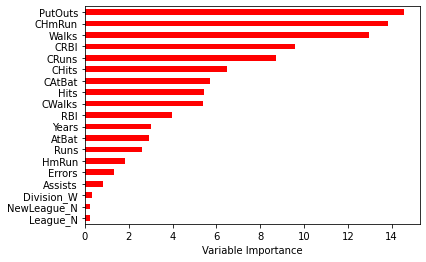

In [210]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

##  6.6. Gradient Boosting Machines





In [211]:
df_4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0
4,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,70.0,1,0,0


In [212]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [213]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor()

In [214]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [215]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1045 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2017 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 12.1min finished


In [216]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 8,
 'n_estimators': 200,
 'subsample': 0.5}

In [217]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "lad",
                                     max_depth = 3,
                                     n_estimators = 100,
                                     subsample = 1).fit(X_train, y_train)

In [218]:
gbm_tuned_y_pred = gbm_tuned.predict(X_test)
gbm_tuned_RMSE = np.sqrt(mean_squared_error(y_test, gbm_tuned_y_pred))
gbm_tuned_RMSE

212.9789416268277

## Variable Severity:

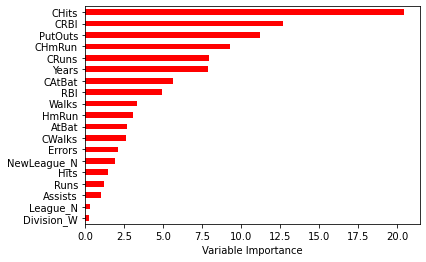

In [219]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 6.7. XGBoost




In [220]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [221]:
xgb = XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [222]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [223]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 1116 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1481 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.9min finished


In [224]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [225]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 4, 
                         n_estimators = 100).fit(X_train, y_train)

In [226]:
xgb_tuned_y_pred = xgb_tuned.predict(X_test)
xgb_tuned_RMSE = np.sqrt(mean_squared_error(y_test, xgb_tuned_y_pred))
xgb_tuned_RMSE

190.6089629120413

## 6.8.  LightGBM

In [227]:
df_4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
3,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0
4,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,70.0,1,0,0


In [228]:
y = df_4['Salary']
X = df_4.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [229]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor()

In [230]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [231]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 596 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 2393 out of 2400 | elapsed:  1.4min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.4min finished


In [232]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

In [233]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 2, 
                          n_estimators = 200).fit(X_train, y_train)

In [234]:
lgbm_tuned_y_pred = lgbm_tuned.predict(X_test)
lgbm_tuned_RMSE = np.sqrt(mean_squared_error(y_test, lgbm_tuned_y_pred))
lgbm_tuned_RMSE

158.5941861243932

## 6.9.  CatBoost

In [235]:
cat_df = df_4

In [236]:
y = cat_df['Salary']
X = cat_df.drop('Salary', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [237]:
catb_model = CatBoostRegressor()

In [238]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [239]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   56.0s finished


0:	learn: 576.5282284	total: 10.7ms	remaining: 5.34s
1:	learn: 572.8846338	total: 15.1ms	remaining: 3.75s
2:	learn: 569.1951190	total: 19.3ms	remaining: 3.2s
3:	learn: 565.4213411	total: 23.7ms	remaining: 2.94s
4:	learn: 561.6096747	total: 28ms	remaining: 2.78s
5:	learn: 557.7523809	total: 32.2ms	remaining: 2.65s
6:	learn: 554.0005526	total: 36.4ms	remaining: 2.56s
7:	learn: 550.3120444	total: 40.7ms	remaining: 2.5s
8:	learn: 546.6543947	total: 44.9ms	remaining: 2.45s
9:	learn: 543.2155404	total: 49ms	remaining: 2.4s
10:	learn: 539.6378472	total: 53.3ms	remaining: 2.37s
11:	learn: 535.9885041	total: 57.7ms	remaining: 2.34s
12:	learn: 532.4961944	total: 61.9ms	remaining: 2.32s
13:	learn: 529.1194019	total: 66.1ms	remaining: 2.29s
14:	learn: 525.8026152	total: 70.2ms	remaining: 2.27s
15:	learn: 522.3574940	total: 74.4ms	remaining: 2.25s
16:	learn: 519.0060493	total: 78.6ms	remaining: 2.23s
17:	learn: 515.4311411	total: 82.7ms	remaining: 2.21s
18:	learn: 511.9627041	total: 86.9ms	remainin

186:	learn: 215.3117801	total: 796ms	remaining: 1.33s
187:	learn: 214.3806262	total: 805ms	remaining: 1.33s
188:	learn: 213.5903768	total: 809ms	remaining: 1.33s
189:	learn: 212.8049249	total: 814ms	remaining: 1.33s
190:	learn: 212.0029914	total: 818ms	remaining: 1.32s
191:	learn: 211.1518249	total: 822ms	remaining: 1.32s
192:	learn: 210.3678959	total: 826ms	remaining: 1.31s
193:	learn: 209.6908429	total: 830ms	remaining: 1.31s
194:	learn: 208.8726835	total: 835ms	remaining: 1.31s
195:	learn: 208.2163861	total: 841ms	remaining: 1.3s
196:	learn: 207.4919888	total: 845ms	remaining: 1.3s
197:	learn: 206.8308186	total: 850ms	remaining: 1.29s
198:	learn: 206.1372879	total: 854ms	remaining: 1.29s
199:	learn: 205.3740808	total: 858ms	remaining: 1.29s
200:	learn: 204.6890100	total: 862ms	remaining: 1.28s
201:	learn: 204.0385320	total: 866ms	remaining: 1.28s
202:	learn: 203.2371894	total: 871ms	remaining: 1.27s
203:	learn: 202.5259622	total: 875ms	remaining: 1.27s
204:	learn: 201.7052872	total:

367:	learn: 132.9896423	total: 1.57s	remaining: 565ms
368:	learn: 132.7397511	total: 1.58s	remaining: 561ms
369:	learn: 132.4268095	total: 1.58s	remaining: 557ms
370:	learn: 132.2739337	total: 1.59s	remaining: 552ms
371:	learn: 132.0062198	total: 1.59s	remaining: 548ms
372:	learn: 131.7595652	total: 1.6s	remaining: 544ms
373:	learn: 131.4984455	total: 1.6s	remaining: 540ms
374:	learn: 131.3343727	total: 1.6s	remaining: 535ms
375:	learn: 131.1118303	total: 1.61s	remaining: 531ms
376:	learn: 130.8207177	total: 1.61s	remaining: 527ms
377:	learn: 130.5559563	total: 1.62s	remaining: 522ms
378:	learn: 130.2494611	total: 1.62s	remaining: 518ms
379:	learn: 129.9066892	total: 1.63s	remaining: 514ms
380:	learn: 129.6569768	total: 1.63s	remaining: 509ms
381:	learn: 129.3770112	total: 1.63s	remaining: 505ms
382:	learn: 129.1010282	total: 1.64s	remaining: 501ms
383:	learn: 128.8695322	total: 1.64s	remaining: 496ms
384:	learn: 128.6350697	total: 1.65s	remaining: 492ms
385:	learn: 128.3329882	total: 

In [240]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.01}

In [241]:
catb_tuned = CatBoostRegressor(depth = 6, iterations = 500, learning_rate = 0.01).fit(X_train, y_train)

0:	learn: 576.4900090	total: 4.32ms	remaining: 2.16s
1:	learn: 572.6211735	total: 6.64ms	remaining: 1.65s
2:	learn: 568.8554361	total: 8.37ms	remaining: 1.39s
3:	learn: 565.1852063	total: 10.2ms	remaining: 1.26s
4:	learn: 561.4014995	total: 12ms	remaining: 1.18s
5:	learn: 557.7706525	total: 13.7ms	remaining: 1.13s
6:	learn: 554.2504539	total: 15.5ms	remaining: 1.09s
7:	learn: 550.4929566	total: 17.2ms	remaining: 1.06s
8:	learn: 546.6927971	total: 19ms	remaining: 1.04s
9:	learn: 543.3202569	total: 20.7ms	remaining: 1.01s
10:	learn: 539.7937246	total: 22.5ms	remaining: 1s
11:	learn: 536.4722745	total: 24.2ms	remaining: 986ms
12:	learn: 532.8110613	total: 26ms	remaining: 974ms
13:	learn: 529.2809612	total: 27.7ms	remaining: 961ms
14:	learn: 525.9242655	total: 29.3ms	remaining: 948ms
15:	learn: 522.6399545	total: 31ms	remaining: 938ms
16:	learn: 519.3099874	total: 32.7ms	remaining: 928ms
17:	learn: 515.9697209	total: 34.4ms	remaining: 921ms
18:	learn: 512.6118306	total: 36.1ms	remaining: 9

214:	learn: 201.9685084	total: 377ms	remaining: 499ms
215:	learn: 201.3627334	total: 379ms	remaining: 498ms
216:	learn: 200.7749163	total: 381ms	remaining: 497ms
217:	learn: 200.1717019	total: 383ms	remaining: 496ms
218:	learn: 199.5331458	total: 385ms	remaining: 494ms
219:	learn: 198.8926271	total: 387ms	remaining: 492ms
220:	learn: 198.3423765	total: 388ms	remaining: 490ms
221:	learn: 197.7344140	total: 390ms	remaining: 489ms
222:	learn: 197.1542488	total: 392ms	remaining: 487ms
223:	learn: 196.6008394	total: 394ms	remaining: 485ms
224:	learn: 196.0001262	total: 396ms	remaining: 483ms
225:	learn: 195.5018936	total: 397ms	remaining: 482ms
226:	learn: 194.9466721	total: 399ms	remaining: 480ms
227:	learn: 194.3079910	total: 401ms	remaining: 478ms
228:	learn: 193.8273343	total: 403ms	remaining: 476ms
229:	learn: 193.3050194	total: 404ms	remaining: 475ms
230:	learn: 192.8317615	total: 406ms	remaining: 473ms
231:	learn: 192.2569628	total: 408ms	remaining: 472ms
232:	learn: 191.7610488	tota

384:	learn: 142.9309275	total: 747ms	remaining: 223ms
385:	learn: 142.7936686	total: 751ms	remaining: 222ms
386:	learn: 142.6118087	total: 753ms	remaining: 220ms
387:	learn: 142.3718238	total: 756ms	remaining: 218ms
388:	learn: 142.1689723	total: 758ms	remaining: 216ms
389:	learn: 141.9558735	total: 760ms	remaining: 214ms
390:	learn: 141.7442512	total: 762ms	remaining: 212ms
391:	learn: 141.5193311	total: 764ms	remaining: 211ms
392:	learn: 141.3537036	total: 766ms	remaining: 209ms
393:	learn: 141.1283830	total: 769ms	remaining: 207ms
394:	learn: 140.9338297	total: 771ms	remaining: 205ms
395:	learn: 140.7992245	total: 773ms	remaining: 203ms
396:	learn: 140.5917176	total: 776ms	remaining: 201ms
397:	learn: 140.4670260	total: 778ms	remaining: 199ms
398:	learn: 140.3074592	total: 780ms	remaining: 197ms
399:	learn: 140.1494169	total: 782ms	remaining: 196ms
400:	learn: 139.9622963	total: 784ms	remaining: 194ms
401:	learn: 139.7863837	total: 787ms	remaining: 192ms
402:	learn: 139.6525565	tota

In [242]:
catb_tuned_y_pred = catb_tuned.predict(X_test)

In [243]:
catb_tuned_RMSE = np.sqrt(mean_squared_error(y_test, catb_tuned_y_pred))
catb_tuned_RMSE

189.9896728051079

# CONCLUSION:

#### In the 'Salary Estimation' study on the 'Hitters' data set, a total of 8 data sets were created:

#### df_1: The observations with missing data in the Hitters data set were created by deleting.

#### df_2: The missing data in the Hitters dataset was created by filling the average of the 'Salary' variable in which they were found.

#### df_3: Missing data in Hitters dataset was estimated and filled with the Gradient Boosting Machine model.

#### df_4: Outliers determined by LocalOutlierFactor in the df_3 dataset were created by suppressing.

#### df_5: The outliers determined by the Local Outlier Factor in the df_3 dataset were deleted.

#### df_6: Observations with missing data in the Hitters data set were created by deleting the outliers.

#### df_7: It was created by deleting missing data and outliers from the Hitters data set.

#### df_8: It was created by adding new variables to the data set. The values in the Years variable were divided, the 'Experience' variable was created, and the annual average of the players' performances and the ratio of their performances in 1986 to all their careers were added as variables.



## Then a function was written for all 'Regression Models' and estimation was performed on all datasets with individual models.

## Finally, model tuning processes were made with Hyperparameter optimizations and final models were established.Finally, model tuning processes were made with Hyperparameter optimizations and final models were established.